# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

100 alti make_model dus.

make dusulebilir (make_model tutuyor bilgiyi
location grup ya da dus
----
kalan objectler icin:
exrtras ve paket ozellikleri topla 4'e bol 

#df2 = df.copy() ile df e donmek kolay.

price ~70000~ altinda yogun
multicollinearity check ( VIF ) __>> 1 1-5 >5 >10
lineer model oldugu icin multicollinearity onemli. nonlinearda degil.

price outlier olsa bile modele girebilir. kotu cikarsa bunlari atabiliriz. 
**outlier make_model bazinda bakilmali.** her make_modeldeki . genel price bakilsa daha yuksek bi esik belirlenir ki ise yaramaz.

-----

one hot columnlu- hiyerarsi yok. ignore test icinde bilmedigi deger gelirse, sparce_ column ismine encofing ekler (true) . transform pandas
ordinal sirali . sirayi sen vereceksin. handleunknown use encoded -1.

**fit_transform to train data / transform to test data **


train test bol.

objectlerin hiyerarsini vs belirle.


make column transform -->  

yeni turetilen cat features arasinda **dummy variable trap** .
coef cok yuksek cikiyor.
drop first.bi nebze dusurur.

outlier at model bazli belirleme ile.



## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    root_mean_squared_error
)
from sklearn.model_selection import train_test_split, cross_validate

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

# Figure size
plt.rcParams['figure.figsize'] = (7, 4)

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("deneme_model_17061501.csv")

In [3]:
df.sample(3)

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,comfort_convenience_count,entertainment_media_count,safety_security_count,extras_count,upholstery
22408,Volvo S90,Volvo,DE,52900.000,Sedan,Used,yes,9100.000,Automatic,Metalic,Dealer,235.000,1969.000,132.000,1918.000,yes,1,1.000,Diesel,5.200,30,13,30,15,premium
1244,Fiat 124 Spider,Fiat,IT,38970.000,Convertible,Used,yes,27000.000,Manual,Non-Metallic,Dealer,170.000,1368.000,146.000,1135.000,no,0,3.000,Petrol,6.800,5,4,9,3,premium
13878,Peugeot 308,Peugeot,FR,17999.000,Compact,Used,yes,40601.000,Manual,Non-Metallic,Dealer,103.000,1499.000,97.000,1169.000,no,0,3.000,Diesel,4.850,9,0,10,1,standard


In [5]:
# list of the four extras columns
extras_cols = [
    'comfort_convenience_count',
    'entertainment_media_count',
    'safety_security_count',
    'extras_count'
]

# compute the row-wise average of those four columns
df['avg_feature_count'] = df[extras_cols].sum(axis=1) / 4

# or equivalently, using .mean():
# df['avg_feature_count'] = df[extras_cols].mean(axis=1)

# quick check
df[['comfort_convenience_count',
    'entertainment_media_count',
    'safety_security_count',
    'extras_count',
    'avg_feature_count'
]].sample(6)

,comfort_convenience_count,entertainment_media_count,safety_security_count,extras_count,avg_feature_count
9062,8,2,12,3,6.250
18701,17,9,11,4,10.250
11568,11,5,13,6,8.750
14718,16,4,14,3,9.250
17917,2,0,6,2,2.500
13220,19,10,24,4,14.250


In [6]:
df.drop(columns=extras_cols, inplace=True)


In [7]:
df.describe()

,price,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
count,24698.000,24698.000,24698.000,24698.000,24698.000,24698.000,24698.000,24698.000,24698.000,24698.000
mean,22072.099,75403.996,162.385,1752.468,130.804,1422.391,0.692,6.114,6.231,8.482
std,17860.716,60020.226,85.962,699.368,54.770,254.852,0.866,5.614,2.140,5.484
min,1000.000,105.000,54.000,332.000,0.000,900.000,0.000,0.000,1.000,0.000
25%,11900.000,26787.750,110.000,1364.000,104.000,1273.000,0.000,2.000,4.900,4.000
50%,17000.000,62326.000,136.000,1598.000,124.000,1395.000,0.000,4.000,5.600,8.000
75%,27000.000,109274.000,190.000,1984.000,156.000,1536.750,1.000,8.000,6.975,12.750
max,200000.000,300000.000,600.000,6208.000,300.000,2900.000,6.000,30.000,15.000,25.750


In [8]:
df.duplicated().sum()

np.int64(3675)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.make_model.value_counts()

make_model
Renault Megane              785
SEAT Leon                   706
Opel Astra                  629
Hyundai i30                 463
Peugeot 308                 452
Ford Focus                  443
Ford Mustang                436
Dacia Sandero               405
Nissan Qashqai              398
SEAT Ibiza                  394
Ford Fiesta                 377
Renault Clio                336
Volvo C70                   324
Opel Corsa                  320
Skoda Octavia               311
Nissan Micra                304
Opel Insignia               277
Fiat 500                    272
Dacia Duster                270
Fiat 500X                   262
Fiat Tipo                   243
Volvo V40                   230
Toyota Yaris                221
Peugeot 208                 216
Skoda Fabia                 210
Peugeot RCZ                 195
Ford Kuga                   191
Peugeot 3008                189
Volvo XC60                  180
Hyundai TUCSON              179
Peugeot 508                 1

In [12]:
df['make_model'].value_counts()[df['make_model'].value_counts() < 100].index


Index(['Toyota C-HR', 'Volvo XC90', 'Toyota MR 2', 'Nissan Juke',
       'Toyota RAV 4', 'Peugeot 307', 'Fiat Panda', 'Hyundai i10',
       'Mercedes-Benz C 200', 'Toyota GT86',
       ...
       'Nissan NV400', 'Skoda Felicia', 'Nissan Rogue', 'Skoda 105',
       'Nissan Tiida', 'Opel Ampera', 'Mercedes-Benz C 320',
       'Mercedes-Benz C 32 AMG', 'Opel Combo Life', 'Dacia Break'],
      dtype='object', name='make_model', length=419)

In [13]:
drop_model = df['make_model'].value_counts()[df['make_model'].value_counts() < 100].index
drop_model

Index(['Toyota C-HR', 'Volvo XC90', 'Toyota MR 2', 'Nissan Juke',
       'Toyota RAV 4', 'Peugeot 307', 'Fiat Panda', 'Hyundai i10',
       'Mercedes-Benz C 200', 'Toyota GT86',
       ...
       'Nissan NV400', 'Skoda Felicia', 'Nissan Rogue', 'Skoda 105',
       'Nissan Tiida', 'Opel Ampera', 'Mercedes-Benz C 320',
       'Mercedes-Benz C 32 AMG', 'Opel Combo Life', 'Dacia Break'],
      dtype='object', name='make_model', length=419)

In [16]:
df = df[~df['make_model'].isin(drop_model)].reset_index(drop=True)

In [17]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
0,Dacia Duster,Dacia,DE,17900.000,Off-Road/Pick-up,Used,yes,65018.000,Manual,Non-Metallic,Dealer,109.000,1461.000,123.000,1504.000,yes,0,5.000,Diesel,4.750,standard,8.750
1,Dacia Duster,Dacia,ES,14290.000,Off-Road/Pick-up,Used,yes,146250.000,Manual,Non-Metallic,Dealer,109.000,1461.000,115.000,1205.000,no,0,2.000,Diesel,4.450,standard,4.000
2,Dacia Duster,Dacia,ES,20409.000,Off-Road/Pick-up,Used,yes,19271.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1405.000,no,0,1.000,Diesel,4.350,standard,1.750
3,Dacia Duster,Dacia,DE,15490.000,Off-Road/Pick-up,Used,yes,74300.000,Manual,Non-Metallic,Dealer,109.000,1461.000,126.000,1504.000,no,0,5.000,Diesel,4.850,standard,5.500
4,Dacia Duster,Dacia,ES,16000.000,Off-Road/Pick-up,Used,yes,89352.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1320.000,no,0,3.000,Diesel,4.750,standard,4.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14532,Volvo XC60,Volvo,DE,50890.000,Off-Road/Pick-up,Used,yes,61448.000,Automatic,Metalic,Dealer,392.000,1969.000,55.000,2223.000,yes,1,3.000,Diesel,5.800,premium,17.500
14533,Volvo XC60,Volvo,DE,54190.000,Off-Road/Pick-up,Used,yes,22021.000,Automatic,Metalic,Dealer,392.000,1969.000,46.000,2161.000,yes,1,2.000,Diesel,5.800,premium,18.250
14534,Volvo XC60,Volvo,BE,51900.000,Off-Road/Pick-up,Used,yes,11953.000,Automatic,Metalic,Dealer,197.000,1969.000,155.000,1869.000,yes,1,1.000,Diesel,5.800,premium,19.750
14535,Volvo XC60,Volvo,DE,64900.000,Off-Road/Pick-up,Employee's car,yes,17860.000,Automatic,Metalic,Dealer,235.000,1969.000,144.000,1504.000,yes,1,0.000,Diesel,5.800,premium,20.000


In [18]:
df.make_model.value_counts()

make_model
Renault Megane         785
SEAT Leon              706
Opel Astra             629
Hyundai i30            463
Peugeot 308            452
Ford Focus             443
Ford Mustang           436
Dacia Sandero          405
Nissan Qashqai         398
SEAT Ibiza             394
Ford Fiesta            377
Renault Clio           336
Volvo C70              324
Opel Corsa             320
Skoda Octavia          311
Nissan Micra           304
Opel Insignia          277
Fiat 500               272
Dacia Duster           270
Fiat 500X              262
Fiat Tipo              243
Volvo V40              230
Toyota Yaris           221
Peugeot 208            216
Skoda Fabia            210
Peugeot RCZ            195
Ford Kuga              191
Peugeot 3008           189
Volvo XC60             180
Hyundai TUCSON         179
Peugeot 508            173
Skoda Superb           171
Toyota Corolla         161
Volvo V60              155
Dacia Logan            155
Toyota Auris           154
SEAT Ateca       

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [19]:
df.drop(columns='make', inplace=True)
df.drop(columns='location', inplace=True)

In [20]:
# Seçilen dataframe üzerinde object (string) tipindeki sütunları alalım
obj_cols = df.select_dtypes(include=['object']).columns

# Her bir sütun için benzersiz değerleri görelim
unique_values = {col: df[col].unique() for col in obj_cols}

# Alternatif olarak, hem sayıyı hem de listeyi bastırmak isterseniz:
for col in obj_cols:
    vals = df[col].unique()
    print(f"{col} ({len(vals)} unique):\n{vals}\n")

make_model (63 unique):
['Dacia Duster' 'Dacia Logan' 'Dacia Sandero' 'Fiat 500' 'Fiat 500C'
 'Fiat 500X' 'Fiat Coupe' 'Fiat Tipo' 'Ford Fiesta' 'Ford Focus'
 'Ford Kuga' 'Ford Mondeo' 'Ford Mustang' 'Hyundai TUCSON' 'Hyundai i20'
 'Hyundai i30' 'Mercedes-Benz A 180' 'Nissan 350Z' 'Nissan 370Z'
 'Nissan Micra' 'Nissan Qashqai' 'Nissan X-Trail' 'Opel Adam' 'Opel Astra'
 'Opel Cascada' 'Opel Corsa' 'Opel Grandland X' 'Opel Insignia'
 'Peugeot 2008' 'Peugeot 206' 'Peugeot 207' 'Peugeot 208' 'Peugeot 3008'
 'Peugeot 308' 'Peugeot 508' 'Peugeot RCZ' 'Renault Captur' 'Renault Clio'
 'Renault Kadjar' 'Renault Megane' 'Renault Talisman' 'SEAT Arona'
 'SEAT Ateca' 'SEAT Ibiza' 'SEAT Leon' 'Skoda Fabia' 'Skoda Karoq'
 'Skoda Kodiaq' 'Skoda Octavia' 'Skoda Scala' 'Skoda Superb'
 'Toyota Auris' 'Toyota Corolla' 'Toyota Yaris' 'Volvo C30' 'Volvo C70'
 'Volvo S60' 'Volvo S90' 'Volvo V40' 'Volvo V60' 'Volvo V90' 'Volvo XC40'
 'Volvo XC60']

body_type (6 unique):
['Off-Road/Pick-up' 'Station wagon' 'S

In [21]:
df['avg_feature_count'] = df['avg_feature_count'].round().astype(int)


In [22]:
df.head()

,make_model,price,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
0,Dacia Duster,17900.000,Off-Road/Pick-up,Used,yes,65018.000,Manual,Non-Metallic,Dealer,109.000,1461.000,123.000,1504.000,yes,0,5.000,Diesel,4.750,standard,9
1,Dacia Duster,14290.000,Off-Road/Pick-up,Used,yes,146250.000,Manual,Non-Metallic,Dealer,109.000,1461.000,115.000,1205.000,no,0,2.000,Diesel,4.450,standard,4
2,Dacia Duster,20409.000,Off-Road/Pick-up,Used,yes,19271.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1405.000,no,0,1.000,Diesel,4.350,standard,2
3,Dacia Duster,15490.000,Off-Road/Pick-up,Used,yes,74300.000,Manual,Non-Metallic,Dealer,109.000,1461.000,126.000,1504.000,no,0,5.000,Diesel,4.850,standard,6
4,Dacia Duster,16000.000,Off-Road/Pick-up,Used,yes,89352.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1320.000,no,0,3.000,Diesel,4.750,standard,4


In [32]:
df['avg_feature_count'].value_counts()

avg_feature_count
8     1196
4     1191
10    1153
6     1078
12    1068
0     1027
14     982
16     749
9      724
5      690
11     633
7      633
13     597
2      575
3      493
15     461
18     360
17     322
1      181
19     171
20     159
21      63
22      27
23       4
Name: count, dtype: int64

In [23]:



df2 =df.copy()







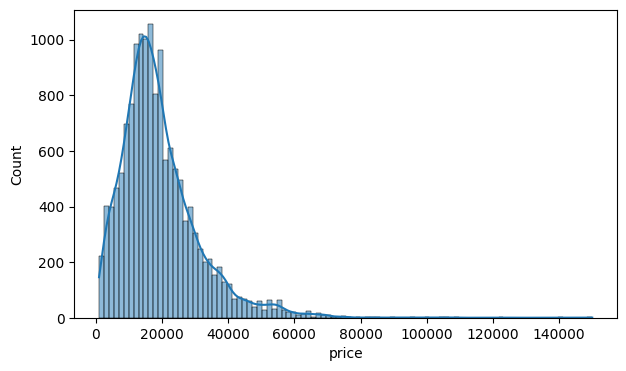

In [24]:
sns.histplot(df.price, bins=100, kde=True);

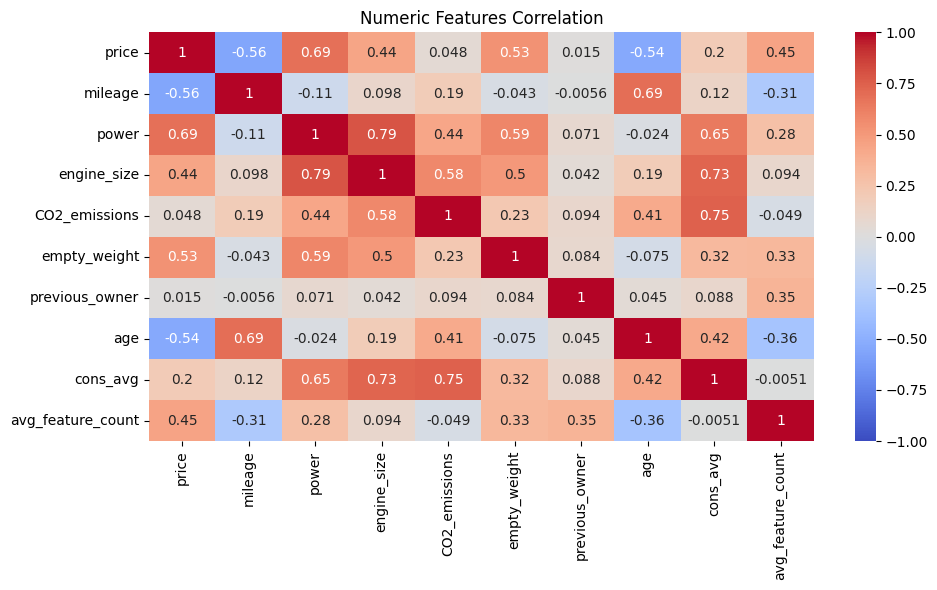

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    vmin=-1, vmax=1,
    annot=True,
    cmap="coolwarm"
)
plt.title("Numeric Features Correlation")
plt.tight_layout()
plt.show()

#VIF SCORE

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1) Select only numeric columns and drop the target
df_numeric = df.select_dtypes(include="number")
X = df_numeric.drop(columns="price")

# 2) Add constant (intercept) term
X_const = sm.add_constant(X)

# 3) Compute VIF for each feature
vif_data = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": [
        variance_inflation_factor(X_const.values, i)
        for i in range(X_const.shape[1])
    ]
})

# 4) Drop the constant and sort
vif_table = (
    vif_data
    .loc[vif_data["feature"] != "const"]
    .sort_values("VIF", ascending=False)
    .reset_index(drop=True)
)

print(vif_table)

             feature   VIF
0           cons_avg 4.305
1              power 3.928
2        engine_size 3.866
3                age 3.001
4      CO2_emissions 2.392
5            mileage 2.201
6       empty_weight 1.675
7  avg_feature_count 1.572
8     previous_owner 1.200



PRICE OUTLIER INSPECTION


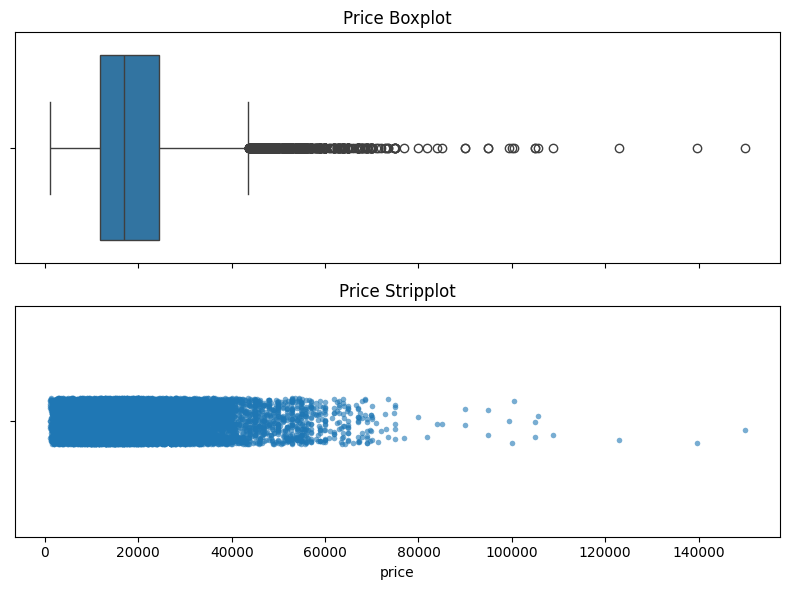

In [27]:
# Figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 1) Boxplot for price
sns.boxplot(x='price', data=df, ax=axes[0])
axes[0].set_title('Price Boxplot')

# 2) Stripplot for price
sns.stripplot(x='price', data=df, ax=axes[1], jitter=True, size=4, alpha=0.6)
axes[1].set_title('Price Stripplot')

# Improve layout
plt.tight_layout()
plt.show()


#       70k sonrasi outlier gibi. ama bu esik belirlemeye yetmez. makemodel bazli bakilsa daha iyi

In [28]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(
        data = df[df.make_model == model],
        x = "make_model",
        y = "price",
        palette = "bright")

    sns.stripplot(
        data = df[df.make_model == model],
        x = "make_model",
        y = "price",
        palette = "Set1")

model = df.make_model.unique()
interact(box_strip, model = model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

interactive(children=(Dropdown(description='model', options=('Dacia Duster', 'Dacia Logan', 'Dacia Sandero', '…

In [29]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"] == model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    count_of_outliers = (
        car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]
    ).count()

    total_outliers.append(count_of_outliers)

    print(f"The count of outlier for {model:<24} : {count_of_outliers:<2}")
    print(f"The rate of outliers : {(count_of_outliers / len(df[df['make_model'] == model])).round(3)}")

print()
print(
    "Total_outliers :", sum(total_outliers),
    "The rate of total outliers :", (sum(total_outliers) / len(df)).round(3)
)

# According to the 1.5 whisker value, we identify the data that we consider to be outliers belonging to each group.

The count of outlier for Dacia Duster             : 6 
The rate of outliers : 0.022
The count of outlier for Dacia Logan              : 0 
The rate of outliers : 0.0
The count of outlier for Dacia Sandero            : 4 
The rate of outliers : 0.01
The count of outlier for Fiat 500                 : 15
The rate of outliers : 0.055
The count of outlier for Fiat 500C                : 2 
The rate of outliers : 0.016
The count of outlier for Fiat 500X                : 8 
The rate of outliers : 0.031
The count of outlier for Fiat Coupe               : 6 
The rate of outliers : 0.041
The count of outlier for Fiat Tipo                : 13
The rate of outliers : 0.053
The count of outlier for Ford Fiesta              : 0 
The rate of outliers : 0.0
The count of outlier for Ford Focus               : 13
The rate of outliers : 0.029
The count of outlier for Ford Kuga                : 1 
The rate of outliers : 0.005
The count of outlier for Ford Mondeo              : 0 
The rate of outliers : 0.0

In [30]:

# 1) Compute per-row Q1, Q3, IQR, lower and upper bounds via groupby-transform
q1 = df.groupby('make_model')['price'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('make_model')['price'].transform(lambda x: x.quantile(0.75))
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# 2) Build a boolean mask: True for non-outliers, False for outliers
mask = (df['price'] >= lower) & (df['price'] <= upper)


#####################################################################################################.      >>>>>>>>>>


# 3) Apply mask to get a new DataFrame without those outlier rows

df_no_outliers = df[mask].reset_index(drop=True)




# Now `df` is untouched, and `df_no_outliers` has all rows where
# price is within [Q1 - 1.5·IQR, Q3 + 1.5·IQR] for each make_model.

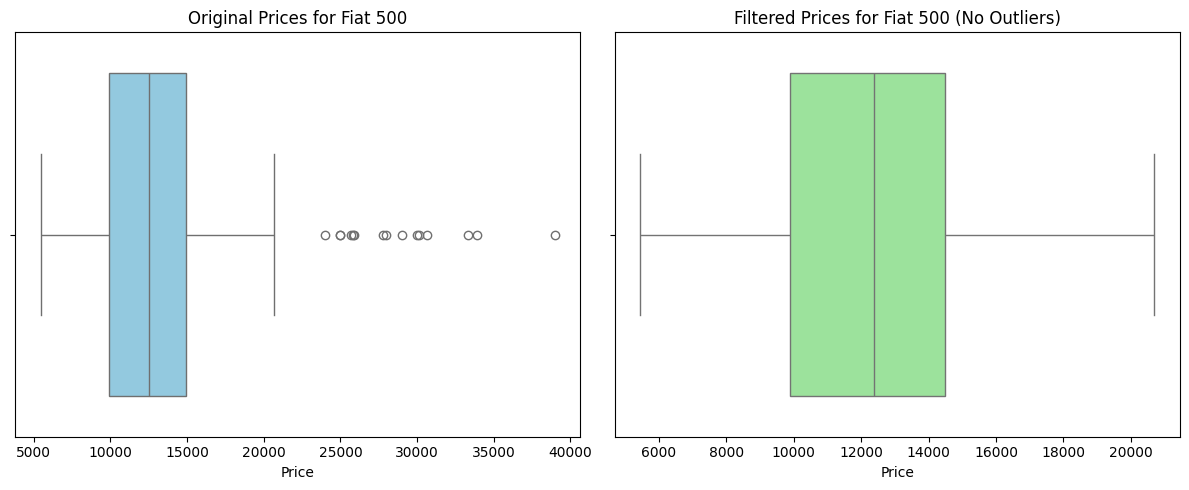

In [31]:

model = "Fiat 500"

# Orijinal ve filtrelenmiş df'lerden fiyat serilerini al
prices_orig     = df[df.make_model == model]["price"]
prices_filtered = df_no_outliers[df_no_outliers.make_model == model]["price"]

# Yan yana iki kutu grafiği
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# 1) Orijinal fiyat dağılımı
sns.boxplot(
    x=prices_orig,
    ax=axes[0],
    color='skyblue'
)
axes[0].set_title(f"Original Prices for {model}")
axes[0].set_xlabel("Price")

# 2) Uç değerler atıldıktan sonra
sns.boxplot(
    x=prices_filtered,
    ax=axes[1],
    color='lightgreen'
)
axes[1].set_title(f"Filtered Prices for {model} (No Outliers)")
axes[1].set_xlabel("Price")

plt.tight_layout()
plt.show()

## multicollinearity control

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [33]:
# Features
X = df_no_outliers.drop(columns='price')

# Target
y = df_no_outliers['price']

In [34]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Verify shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (11336, 19), X_test: (2834, 19)
y_train: (11336,), y_test: (2834,)


## OneHotEncoder

### Example

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [55]:
# from sklearn.model_selection import train_test_split

#enc.fit_transform(X_train)

# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.

#enc.transform(X_test)

# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


In [64]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,paint,seller,full_service_history,fuel_type,upholstery
0,Dacia Duster,Off-Road/Pick-up,Used,yes,Manual,Non-Metallic,Dealer,yes,Diesel,standard


In [65]:
# 1) Tüm object‐dtype sütunları al
obj_cols = df.select_dtypes(include='object').columns.tolist()

# 2) make_model’i listeden çıkar
if 'make_model' in obj_cols:
    obj_cols.remove('make_model')

# 3) Her sütun için value_counts yazdır
for col in obj_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- body_type ---
body_type
Sedan               3000
Station wagon       2995
Compact             2758
Off-Road/Pick-up    2512
Coupe               1683
Convertible         1589
Name: count, dtype: int64

--- type ---
type
Used              13495
Demonstration       590
Employee's car      329
Pre-registered      123
Name: count, dtype: int64

--- warranty ---
warranty
yes    13158
no      1379
Name: count, dtype: int64

--- gearbox ---
gearbox
Manual       9682
Automatic    4855
Name: count, dtype: int64

--- paint ---
paint
Metalic         7990
Non-Metallic    6547
Name: count, dtype: int64

--- seller ---
seller
Dealer            13424
Private seller     1113
Name: count, dtype: int64

--- full_service_history ---
full_service_history
no     7536
yes    7001
Name: count, dtype: int64

--- fuel_type ---
fuel_type
Petrol      9480
Diesel      4718
Gas          246
Others        73
Electric      20
Name: count, dtype: int64

--- upholstery ---
upholstery
standard    9216
premium     53

In [35]:
#One-hot ve ordinal encode için listeleri güncelleyin



cat_onehot = [
    'make_model',
    'body_type',        # Sedan, Station wagon, Compact, …
    'warranty',         # yes/no
    'gearbox',          # Manual/Automatic
    'paint',            # Metalic/Non-Metallic
    'seller',           # Dealer/Private seller
    'full_service_history',  # yes/no
    'fuel_type',         # Petrol, Diesel, Gas, Others, Electric
    'upholstery' 
]

cat_ordinal = ['type' ]
# Used, Demonstration, Employee's car, Pre-registered
#  -- -- -- - -- -- - -- --  -- - -- - -- - --


# Her ordinal sütunun doğal sıralaması
cat_for_type = ['Used', 'Demonstration', "Employee's car", 'Pre-registered']


In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    (OrdinalEncoder(categories=[cat_for_type]), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False  # MinMaxScaler()
)

column_trans = column_trans.set_output(transform="pandas")

"""
make_column_transformer
function automates transformations to features. It transforms the features
in order according to the order we will give into this function.

What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
the cat_onehot list so that all categorical data passed in the test set and
not in the train set will be converted to 0.

What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
perform ordinal encoder conversion according to the hierarchical order of the unique categorical
observations in the categories list.

IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
the same as the order of the features in the cat_ordinal list, or you will get an error.

With remainder='passthrough' it means to leave all other features that are not converted.
if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
the non-transformed features.

verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature_names_out=False."""

'\nmake_column_transformer\nfunction automates transformations to features. It transforms the features\nin order according to the order we will give into this function.\n\nWhat does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?\nWith the handle_unknown = "ignore" parameter, onehotencoder converts all the features in\nthe cat_onehot list so that all categorical data passed in the test set and\nnot in the train set will be converted to 0.\n\nWhat does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?\nAfter the onehotencoder conversion to the relevant features, all features in the cat_ordinal list\nperform ordinal encoder conversion according to the hierarchical order of the unique categorical\nobservations in the categories list.\n\nIMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be\nthe same as the order of the features in the cat_ordinal list, or you will get an error.\n\nWith rema

In [37]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
8817,Renault Clio,Compact,Used,yes,14100.000,Automatic,Metalic,Dealer,131.000,1332.000,126.000,1096.000,no,1,1.000,Petrol,5.800,standard,12
9837,SEAT Arona,Off-Road/Pick-up,Used,yes,22640.000,Manual,Non-Metallic,Dealer,90.000,999.000,98.000,1263.000,yes,1,3.000,Gas,5.100,standard,8
3076,Ford Mustang,Convertible,Used,yes,69000.000,Manual,Non-Metallic,Private seller,305.000,3727.000,225.000,2077.000,yes,2,9.000,Petrol,13.000,premium,10
13652,Volvo V60,Station wagon,Used,yes,64460.000,Automatic,Metalic,Dealer,190.000,1969.000,119.000,1752.000,yes,1,3.000,Diesel,4.700,premium,17
3532,Hyundai TUCSON,Off-Road/Pick-up,Used,yes,21610.000,Manual,Metalic,Dealer,132.000,1591.000,147.000,1564.000,yes,1,4.000,Petrol,6.650,standard,8


In [38]:
X_test.head()

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
3448,Hyundai TUCSON,Off-Road/Pick-up,Used,yes,47987.000,Automatic,Metalic,Dealer,185.000,1995.000,170.000,1504.000,yes,0,2.000,Diesel,6.550,premium,18
13025,Volvo C70,Convertible,Used,no,150283.000,Automatic,Metalic,Dealer,222.000,2521.000,234.000,1634.000,yes,4,15.000,Petrol,10.850,premium,8
9002,Renault Megane,Coupe,Used,yes,229000.000,Manual,Non-Metallic,Private seller,110.000,1461.000,93.000,1279.000,no,0,6.000,Diesel,3.650,standard,0
12540,Toyota Corolla,Station wagon,Used,yes,21000.000,Automatic,Non-Metallic,Dealer,184.000,1987.000,89.000,1445.000,no,0,1.000,Petrol,5.875,standard,3
10298,SEAT Ibiza,Coupe,Used,yes,113000.000,Manual,Metalic,Dealer,69.000,1198.000,125.000,1102.000,no,1,11.000,Petrol,6.250,standard,7


In [39]:
X_train.shape, X_test.shape


((11336, 19), (2834, 19))

In [40]:
column_trans.fit_transform(X_train).head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
8817,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,14100.000,131.000,1332.000,126.000,1096.000,1,1.000,5.800,12
9837,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,22640.000,90.000,999.000,98.000,1263.000,1,3.000,5.100,8
3076,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,69000.000,305.000,3727.000,225.000,2077.000,2,9.000,13.000,10
13652,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [41]:

X_train_trans = column_trans.fit_transform(X_train)

X_test_trans  = column_trans.transform(X_test)


In [42]:
X_train_trans.shape ,  X_test_trans.shape 

((11336, 96), (2834, 96))

In [43]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
8817,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,14100.000,131.000,1332.000,126.000,1096.000,1,1.000,5.800,12
9837,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,22640.000,90.000,999.000,98.000,1263.000,1,3.000,5.100,8
3076,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,69000.000,305.000,3727.000,225.000,2077.000,2,9.000,13.000,10
13652,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [44]:
X_test_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
3448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,47987.000,185.000,1995.000,170.000,1504.000,0,2.000,6.550,18
13025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,150283.000,222.000,2521.000,234.000,1634.000,4,15.000,10.850,8
9002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,229000.000,110.000,1461.000,93.000,1279.000,0,6.000,3.650,0
12540,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [45]:
X_train_trans.join(y_train).corr()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count,price
make_model_Dacia Duster,1.000,-0.014,-0.023,-0.019,-0.013,-0.018,-0.014,-0.017,-0.023,-0.024,-0.016,-0.014,-0.024,-0.015,-0.013,-0.025,-0.011,-0.011,-0.012,-0.021,-0.023,-0.012,-0.012,-0.029,-0.013,-0.020,-0.013,-0.019,-0.012,-0.013,-0.014,-0.017,-0.015,-0.024,-0.015,-0.016,-0.013,-0.021,-0.012,-0.032,-0.013,-0.013,-0.014,-0.023,-0.031,-0.016,-0.013,-0.013,-0.020,-0.014,-0.015,-0.014,-0.014,-0.016,-0.012,-0.021,-0.012,-0.011,-0.018,-0.014,-0.012,-0.011,-0.016,-0.067,-0.047,-0.049,0.276,-0.064,-0.056,-0.006,0.006,-0.079,0.079,-0.043,0.043,0.037,-0.037,0.045,-0.045,0.041,-0.004,0.080,-0.008,-0.061,-0.070,0.070,-0.010,-0.029,-0.062,-0.051,-0.006,0.008,-0.055,-0.050,-0.016,-0.057,-0.034
make_model_Dacia Logan,-0.014,1.000,-0.018,-0.014,-0.010,-0.014,-0.010,-0.013,-0.017,-0.018,-0.012,-0.011,-0.018,-0.011,-0.010,-0.019,-0.009,-0.009,-0.009,-0.016,-0.017,-0.009,-0.009,-0.022,-0.010,-0.015,-0.010,-0.015,-0.009,-0.010,-0.010,-0.013,-0.011,-0.018,-0.011,-0.012,-0.010,-0.016,-0.009,-0.024,-0.010,-0.010,-0.011,-0.017,-0.023,-0.012,-0.010,-0.010,-0.016,-0.011,-0.012,-0.011,-0.011,-0.012,-0.009,-0.016,-0.009,-0.009,-0.014,-0.010,-0.009,-0.009,-0.012,-0.037,-0.037,-0.037,-0.048,-0.024,0.164,-0.033,0.033,-0.058,0.058,-0.032,0.032,-0.013,0.013,0.015,-0.015,-0.014,-0.003,0.054,-0.006,0.000,-0.065,0.065,-0.019,0.031,-0.090,-0.074,-0.014,-0.054,-0.018,0.018,-0.026,-0.073,-0.093
make_model_Dacia Sandero,-0.023,-0.018,1.000,-0.023,-0.016,-0.023,-0.017,-0.021,-0.028,-0.030,-0.020,-0.018,-0.030,-0.019,-0.017,-0.031,-0.014,-0.014,-0.015,-0.026,-0.028,-0.015,-0.015,-0.036,-0.017,-0.025,-0.017,-0.024,-0.015,-0.016,-0.017,-0.021,-0.019,-0.030,-0.019,-0.020,-0.017,-0.026,-0.015,-0.040,-0.016,-0.017,-0.018,-0.029,-0.038,-0.020,-0.016,-0.016,-0.025,-0.018,-0.019,-0.018,-0.017,-0.020,-0.015,-0.026,-0.015,-0.014,-0.022,-0.017,-0.015,-0.014,-0.019,0.110,-0.059,-0.059,-0.049,0.114,-0.083,-0.027,0.027,-0.094,0.094,-0.067,0.067,0.049,-0.049,0.092,-0.092,-0.043,-0.005,0.074,-0.010,0.024,-0.124,0.124,0.

In [46]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


In [47]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr, width=1000, height=1000)
fig.show()

<Axes: >

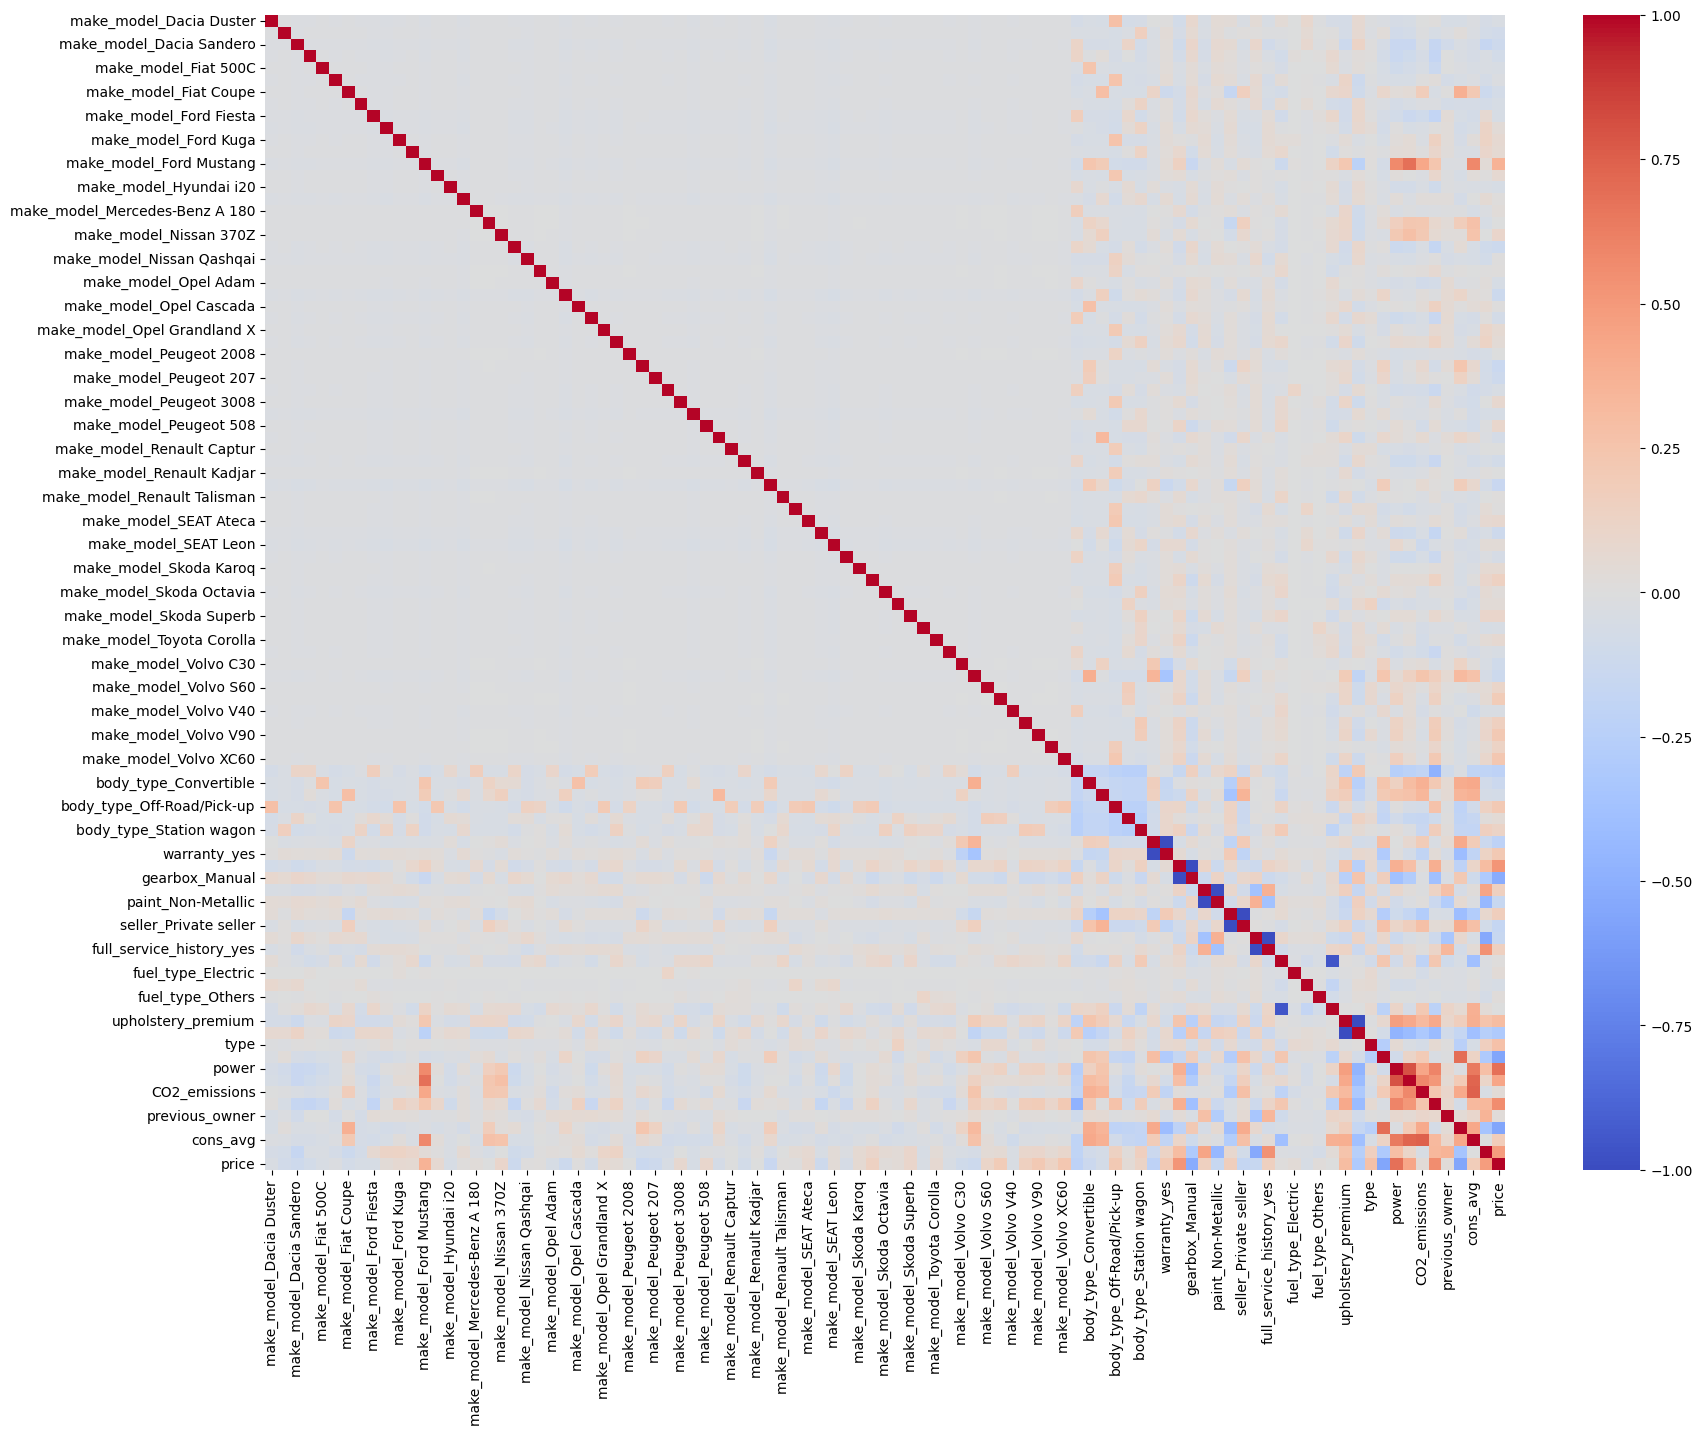

In [48]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    X_train_trans.join(y_train).corr(),
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)

## OrdinalEncoder

### Example

In [53]:

# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

In [56]:
# from sklearn.preprocessing import OrdinalEncoder
# # categories = [1. ,2. ,3. ,... n.] gibi siralama
# # unknown value -1


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

## Scaling

In [50]:
# Scaling

scaler = MinMaxScaler().set_output(transform="pandas")

scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled  = scaler.transform(X_test_trans)


In [51]:
X_train_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
8817,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.047,0.139,0.197,0.421,0.106,0.167,0.033,0.339,0.522
9837,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.075,0.059,0.131,0.328,0.196,0.167,0.100,0.289,0.348
3076,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.230,0.480,0.669,0.753,0.636,0.333,0.300,0.859,0.435
13652,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [52]:
X_test_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
3448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.160,0.245,0.328,0.569,0.326,0.000,0.067,0.394,0.783
13025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.501,0.318,0.431,0.783,0.397,0.667,0.500,0.704,0.348
9002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.763,0.098,0.222,0.311,0.205,0.000,0.200,0.184,0.000
12540,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [53]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2"  : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse": root_mean_squared_error(y_train, y_train_pred),
            "mape": mean_absolute_percentage_error(y_train, y_train_pred)
        },
        "test": {
            "R2"  : r2_score(y_test,  y_pred),
            "mae" : mean_absolute_error(y_test,  y_pred),
            "mse" : mean_squared_error(y_test,  y_pred),
            "rmse": root_mean_squared_error(y_test,  y_pred),
            "mape": mean_absolute_percentage_error(y_test,  y_pred)
        }
    }

    return pd.DataFrame(scores)

In [54]:



from sklearn.linear_model import LinearRegression


lm = LinearRegression()





lm.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
pd.options.display.float_format = '{:.3f}'.format


train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.905
mae,2324.176,2435.600
mse,11076658.101,12135778.393
rmse,3328.161,3483.644
mape,0.189,0.193


                                    ###ADJUSTED R2 SCORE

In [57]:

def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]  # number of observations
    p = X.shape[1]  # number of independent variables
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# If there are too many features in our data, but not enough rows,
# this can create a false improvement in our model's R2_score.
# Especially in such cases, or if too many new features
# (such as dummy variables) have been added to our data,
# we need to detect the “true” R2_score using the adjusted R2_score.

# Adjusted R2_score checks the trade-off between the number of observations and the number of features.
# Increasing the number of features doesn’t always mean a better R2_score.

In [58]:
y_pred = lm.predict(X_test_scaled)

# We take our predictions (y_pred) from the model to use in the function we defined above.

In [59]:
adj_r2(y_test, y_pred, X_test_scaled)

# We obtain our score by giving the necessary parameters to the function.

0.9018152768233306

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# # Pre-defined functions

# def train_val(model, X_train, y_train, X_test, y_test):
#     """This function will help you get regression metrics on both train
#     and test set provided.

#     Args:
#         model : model that is used for prediction
#         X_train : Train features
#         y_train : Train target
#         X_test  : Test features
#         y_test  : Test target

#     Returns:
#         Dataframe : Returns scores dataframe
#     """

#     y_pred = model.predict(X_test)
#     y_train_pred = model.predict(X_train)

#     scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
#     "mae" : mean_absolute_error(y_train, y_train_pred),
#     "mse" : mean_squared_error(y_train, y_train_pred),
#     "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

#     "test": {"R2" : r2_score(y_test, y_pred),
#     "mae" : mean_absolute_error(y_test, y_pred),
#     "mse" : mean_squared_error(y_test, y_pred),
#     "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

#     return pd.DataFrame(scores)

# def adj_r2(y_test, y_pred, X):
#     """This function gives adjusted R^2

#     Args:
#         y_test : Actual target
#         y_pred : Predcition
#         X : Features

#     Returns:
#         adj_r2: Adjusted R^2
#     """
#     r2 = r2_score(y_test, y_pred)
#     n = X.shape[0]   # number of observations
#     p = X.shape[1]   # number of independent variables
#     adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
#     return adj_r2


## Cross Validate

In [60]:

model = LinearRegression()

scores = cross_validate(
    model,
    X_train_scaled,
    y_train,
    scoring=[
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error',
        'neg_mean_absolute_percentage_error'
    ],
    cv=10,
    return_train_score=True
    # return_indices=True
)


In [61]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.030,0.002,0.908,0.909,-2390.250,-2318.326,-11696051.659,-11017573.289,-3419.949,-3319.273,-0.209,-0.188
1,0.017,0.002,0.908,0.909,-2289.667,-2328.910,-10817051.073,-11115727.879,-3288.929,-3334.026,-0.164,-0.191
2,0.015,0.001,0.899,0.910,-2509.007,-2303.778,-13854739.662,-10785139.096,-3722.196,-3284.074,-0.198,-0.188
3,0.014,0.001,0.912,0.909,-2335.487,-2324.418,-10912756.720,-11107710.155,-3303.446,-3332.823,-0.190,-0.190
4,0.013,0.001,0.907,0.909,-2238.545,-2338.252,-9675633.225,-11244340.020,-3110.568,-3353.258,-0.201,-0.188
5,0.014,0.001,0.907,0.909,-2287.626,-2330.601,-10561507.665,-11149990.452,-3249.847,-3339.160,-0.196,-0.189
6,0.014,0.001,0.888,0.911,-2351.806,-2322.569,-12993879.582,-10884975.866,-3604.702,-3299.239,-0.182,-0.190
7,0.014,0.001,0.910,0.909,-2406.627,-2312.266,-11902831.125,-10999540.171,-3450.048,-3316.555,-0.184,-0.189
8,0.014,0.001,0.912,0.909,-2308.354,-2325.571,-10331349.100,-11170127.581,-3214.242,-3342.174,-0.177,-0.190
9,0.014,0.001,0.919,0.908,-2325.342,-2329.756,-10312572.310,-11172674.733,-3211.319,-3342.555,-0.205,-0.189


In [62]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.907
train_r2                                           0.909
test_neg_mean_absolute_error                   -2344.271
train_neg_mean_absolute_error                  -2323.445
test_neg_mean_squared_error                -11305837.212
train_neg_mean_squared_error               -11064779.924
test_neg_root_mean_squared_error               -3357.525
train_neg_root_mean_squared_error              -3326.314
test_neg_mean_absolute_percentage_error           -0.191
train_neg_mean_absolute_percentage_error          -0.189
dtype: float64

In [64]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.905
mae,2324.176,2435.600
mse,11076658.101,12135778.393
rmse,3328.161,3483.644
mape,0.189,0.193


In [66]:
# Predict using the scaled test set you used for training
y_pred = lm.predict(X_test_scaled)
lm_R2   = r2_score(y_test,       y_pred)
lm_mae  = mean_absolute_error(y_test,       y_pred)
lm_rmse = root_mean_squared_error(y_test,   y_pred)
lm_mape = mean_absolute_percentage_error(y_test,  y_pred)

print(f"Linear Model -> R2: {lm_R2:.3f}, MAE: {lm_mae:.3f}, RMSE: {lm_rmse:.3f}, MAPE: {lm_mape:.3f}")


Linear Model -> R2: 0.905, MAE: 2435.600, RMSE: 3483.644, MAPE: 0.193


## Prediction Error

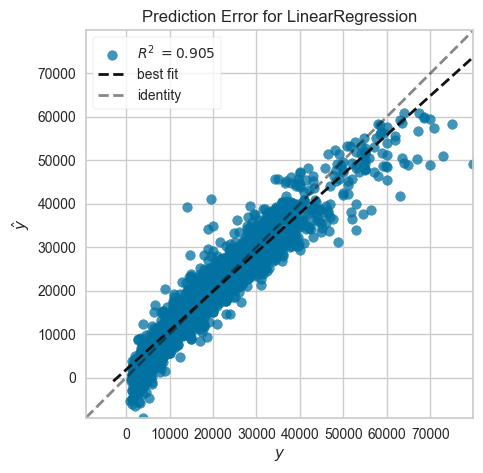

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:



from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)   # Evaluate the model on the test data
visualizer.show()

# From prediction error chart, we can see how good our model's predictions are. When we look at the image below,
# we can see that cars with prices of 70 thousand EURO and above are pulling our best fit line down.
# If I drop the very low-priced cars that I see from the data that break my scores,
# the cars with 70 thousand EURO and above, or the outlier-priced cars that I have determined on
# the basis of models from my data and retrain from this data, I can get better scores.
#
# We will continue to drop cars with very low prices and cars over 70.000 EURO in this notebook.


## Residual Plot

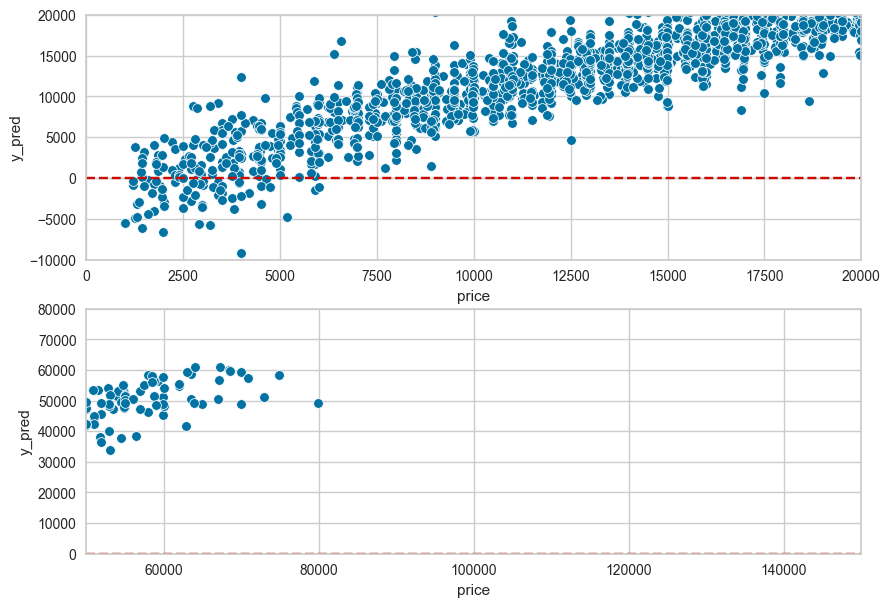

In [70]:
# Predict on the scaled test set
y_pred = lm.predict(X_test_scaled)

plt.figure(figsize=(10,7))

# First subplot: low-price range
plt.subplot(211)
sns.scatterplot(x=y_test, y=y_pred)  # residuals
plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("y_pred")
plt.xlim([0, 20000])
plt.ylim([-10000, 20000])

# Second subplot: high-price range
plt.subplot(212)
sns.scatterplot(x=y_test, y=y_pred)  # residuals
plt.axhline(y=0, color="r", linestyle="--")
plt.ylabel("y_pred")
plt.xlim([50000, 150000])
plt.ylim([0, 80000])

plt.show()

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.

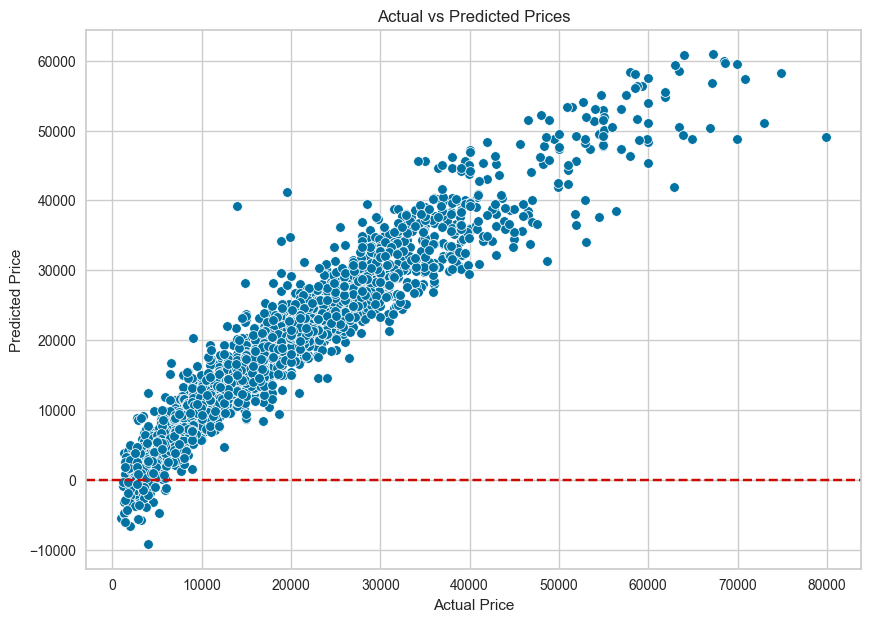

In [72]:

plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test, y=y_pred)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

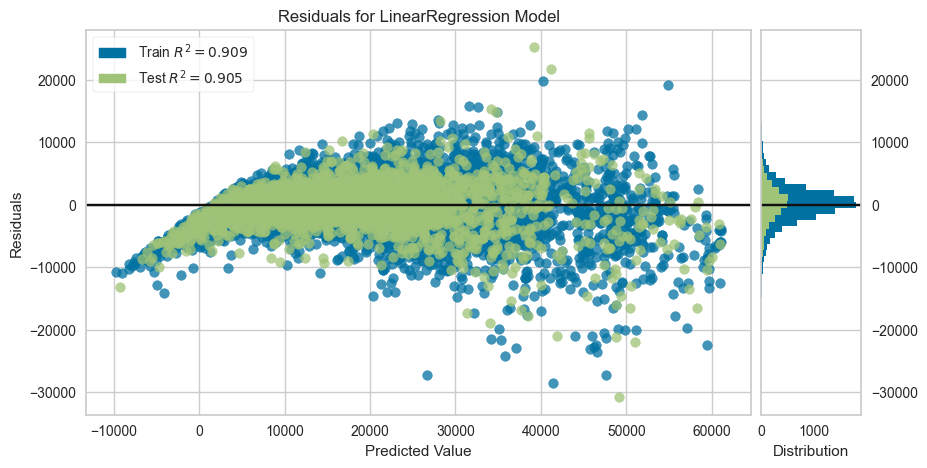

In [73]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [113]:

# 1) Orijinali sakla
df_full = df.copy()


# DF CLEAN DOUBLE FILTERED -------- hem make_model iqr filtresi hem de genel 70000-7500 filtresi ###################################


# 3) Fiyat aralığı filtresi sadece df_no_outliers üzerinde
df_clean = df_no_outliers[
    (df_no_outliers.price > 3500) &
    (df_no_outliers.price < 40000)
].reset_index(drop=True)





In [114]:
print("Orijinal df:", df.shape)
print("Uç değer çıkarılmış df_no_outliers:", df_no_outliers.shape)
print("Son filtreli df_clean:", df_clean.shape)

Orijinal df: (14537, 20)
Uç değer çıkarılmış df_no_outliers: (14170, 20)
Son filtreli df_clean: (13010, 20)


In [115]:

# After dropping outlier observations, split the remaining data into X and y, then into train and test sets.
X = df_clean.drop(columns="price")
y = df_clean.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
# Apply your column transformer to train and test

X_train = column_trans.fit_transform(X_train)
X_test  = column_trans.transform(X_test)

In [117]:
X_train.head() 

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
9272,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,59986.000,150.000,1968.000,0.000,1504.000,0,6.000,5.300,15
3599,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,45680.000,110.000,1498.000,136.000,1400.000,2,2.000,6.250,10
5795,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,28452.000,87.000,1398.000,135.000,1163.000,2,8.000,6.050,8
12473,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [118]:
X_test.head() 

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Coupe,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,warranty_no,warranty_yes,gearbox_Automatic,gearbox_Manual,paint_Metalic,paint_Non-Metallic,seller_Dealer,seller_Private seller,full_service_history_no,full_service_history_yes,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gas,fuel_type_Others,fuel_type_Petrol,upholstery_premium,upholstery_standard,type,mileage,power,engine_size,CO2_emissions,empty_weight,previous_owner,age,cons_avg,avg_feature_count
4679,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,39998.000,159.000,1332.000,122.000,1390.000,1,2.000,5.650,16
2662,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,22909.000,150.000,1997.000,107.000,1680.000,1,2.000,6.150,19
6021,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,36323.000,120.000,1560.000,111.000,1504.000,0,4.000,5.200,1
1954,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [119]:
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [120]:

lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Performance metrics of the linear regression model trained on df_clean, which contains data filtered by the IQR outlier rule 
and restricted to car prices between**
---

**€3500 and €40,000.**

In [122]:

train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)


,train,test
R2,0.893,0.896
mae,1974.803,1991.404
mse,7046702.037,7045436.391
rmse,2654.562,2654.324
mape,0.139,0.138


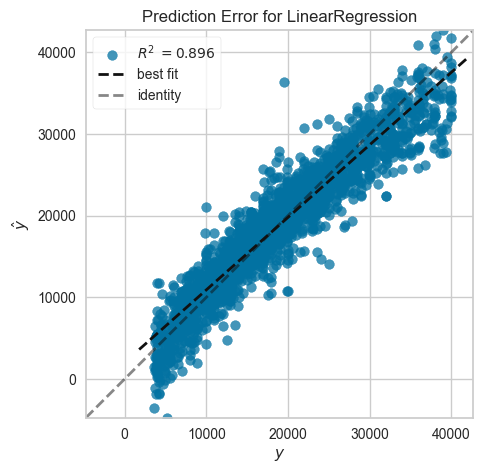

In [123]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)   # Evaluate the model on the test data
visualizer.show();


In [124]:
model = LinearRegression()

scores = cross_validate(
    model,
    X_train_scaled,
    y_train,
    scoring=[
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error',
        'neg_mean_absolute_percentage_error'
    ],
    cv=10,
    return_train_score=True
    # return_indices=True
)


pd.DataFrame(scores).iloc[:, 2:].mean()


test_r2                                           0.891
train_r2                                          0.893
test_neg_mean_absolute_error                  -1993.871
train_neg_mean_absolute_error                 -1973.897
test_neg_mean_squared_error                -7194207.370
train_neg_mean_squared_error               -7039016.820
test_neg_root_mean_squared_error              -2680.909
train_neg_root_mean_squared_error             -2653.099
test_neg_mean_absolute_percentage_error          -0.140
train_neg_mean_absolute_percentage_error         -0.139
dtype: float64

In [125]:
y_pred = lm2.predict(X_test_scaled)

lm2_R2   = r2_score(y_test, y_pred)
lm2_mae  = mean_absolute_error(y_test, y_pred)
lm2_rmse = root_mean_squared_error(y_test, y_pred)
lm2_mape = mean_absolute_percentage_error(y_test, y_pred)


In [126]:

pd.DataFrame(lm2.coef_, index=X_train.columns, columns=['Coef'])

# The coefficients of the features with onehot encoder applied are very high. Dummy variable trap
#
# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-colinearity/

# Dummy variable trap

#  is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur as a result of deriving or extracting one argument from other arguments.
#
# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model. However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables), problems may arise with the
# accuracy of the model. This may also be reflected in the significantly higher correlations in the correlation
# matrix of the independent variables

,Coef
make_model_Dacia Duster,-1613.774
make_model_Dacia Logan,-4284.444
make_model_Dacia Sandero,-4594.931
make_model_Fiat 500,-4254.347
make_model_Fiat 500C,-2481.143
make_model_Fiat 500X,-1134.630
make_model_Fiat Coupe,8997.060
make_model_Fiat Tipo,-4127.623
make_model_Ford Fiesta,-3314.414
make_model_Ford Focus,-879.771


## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [127]:
X = df_clean.drop(columns="price")
y = df_clean.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
9272,SEAT Ateca,Off-Road/Pick-up,Used,yes,59986.000,Manual,Metalic,Dealer,150.000,1968.000,0.000,1504.000,yes,0,6.000,Diesel,5.300,premium,15
3599,Hyundai i30,Sedan,Used,yes,45680.000,Manual,Metalic,Dealer,110.000,1498.000,136.000,1400.000,yes,2,2.000,Petrol,6.250,standard,10
5795,Opel Corsa,Compact,Used,yes,28452.000,Manual,Metalic,Dealer,87.000,1398.000,135.000,1163.000,no,2,8.000,Petrol,6.050,premium,8
12473,Volvo V40,Compact,Used,yes,96974.000,Manual,Non-Metallic,Dealer,120.000,1969.000,82.000,1423.000,no,0,5.000,Diesel,3.450,standard,3
10376,SEAT Leon,Station wagon,Used,yes,13500.000,Automatic,Non-Metallic,Dealer,300.000,1984.000,161.000,1454.000,yes,1,2.000,Petrol,7.500,standard,12


In [129]:

cat_onehot = [
    'make_model',
    'body_type',        # Sedan, Station wagon, Compact, …
    'warranty',         # yes/no
    'gearbox',          # Manual/Automatic
    'paint',            # Metalic/Non-Metallic
    'seller',           # Dealer/Private seller
    'full_service_history',  # yes/no
    'fuel_type',         # Petrol, Diesel, Gas, Others, Electric
    'upholstery' 
]

cat_ordinal = ['type' ]



cat_for_type = ['Used', 'Demonstration', "Employee's car", 'Pre-registered']


In [130]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot  = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type])

column_trans = make_column_transformer(
    (enc_onehot,  cat_onehot),
    (enc_ordinal, cat_ordinal),
    remainder='passthrough',
    verbose_feature_names_out=False  # MinMaxScaler()
)





In [131]:
                     #OPERATIONS


from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge())
]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# If we want the outputs of the given transform algorithms to be dataframes,
# we can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)         # 3 in 1

# What happens can be described as follows:
# The data are split into TRAINING data and TEST data according to ratio of train_test_split
#
# Fit process:
# ridge_pipe.fit(X_train, y_train) Here, what does it do sequentially?

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [132]:
train_val(ridge_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.896
mae,1976.033,1994.031
mse,7050837.163,7057763.457
rmse,2655.341,2656.645
mape,0.139,0.138


In [133]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

In [134]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.038,0.006,0.887,0.893,-2018.287,-1971.465,-7287526.830,-7033743.181,-2699.542,-2652.121,-0.138,-0.138
2,0.017,0.004,0.896,0.892,-1988.203,-1975.340,-7022887.294,-7061342.103,-2650.073,-2657.319,-0.136,-0.139
3,0.013,0.003,0.892,0.893,-1947.698,-1984.048,-6398314.404,-7131185.497,-2529.489,-2670.428,-0.137,-0.139
4,0.013,0.003,0.891,0.893,-2088.464,-1961.935,-7546483.836,-7007023.063,-2747.086,-2647.078,-0.147,-0.137
5,0.013,0.003,0.892,0.893,-1946.418,-1982.116,-6857413.651,-7081564.223,-2618.666,-2661.121,-0.145,-0.138
6,0.013,0.003,0.888,0.893,-1972.590,-1977.293,-7244690.753,-7036747.867,-2691.596,-2652.687,-0.138,-0.139
7,0.013,0.003,0.890,0.893,-2017.883,-1971.187,-7852310.149,-6974683.110,-2802.197,-2640.963,-0.141,-0.138
8,0.013,0.003,0.886,0.893,-2052.240,-1967.571,-7919429.873,-6964686.381,-2814.148,-2639.069,-0.135,-0.139
9,0.013,0.003,0.889,0.893,-1949.792,-1982.475,-6883853.147,-7079096.333,-2623.710,-2660.657,-0.136,-0.139
10,0.013,0.003,0.895,0.892,-1967.523,-1979.658,-6950375.469,-7069916.098,-2636.356,-2658.931,-0.144,-0.138


In [135]:

scores.iloc[:,2:].mean()

test_r2                                           0.891
train_r2                                          0.893
test_neg_mean_absolute_error                  -1994.910
train_neg_mean_absolute_error                 -1975.309
test_neg_mean_squared_error                -7196328.541
train_neg_mean_squared_error               -7043998.786
test_neg_root_mean_squared_error              -2681.286
train_neg_root_mean_squared_error             -2654.037
test_neg_mean_absolute_percentage_error          -0.140
train_neg_mean_absolute_percentage_error         -0.138
dtype: float64

      best alpha

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
alpha_space = np.linspace(0.001, 100, 100)


In [138]:

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space}  # Parameter names should be used together with the model name defined in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [139]:
pipe_model.get_params()


{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'warranty',
                                     'gearbox', 'paint', 'seller',
                                     'full_service_history', 'fuel_type',
                                     'upholstery']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                'Demonstration',
                                                                "Employee's car",
                                                                'Pre-registered']]),
                                    ['type'])],
       

In [140]:
ridge_grid_model.fit(X_train, y_train)

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,{'Ridge__alpha': array([1.0000...00000000e+02])}
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"


In [141]:
ridge_grid_model.best_estimator_

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


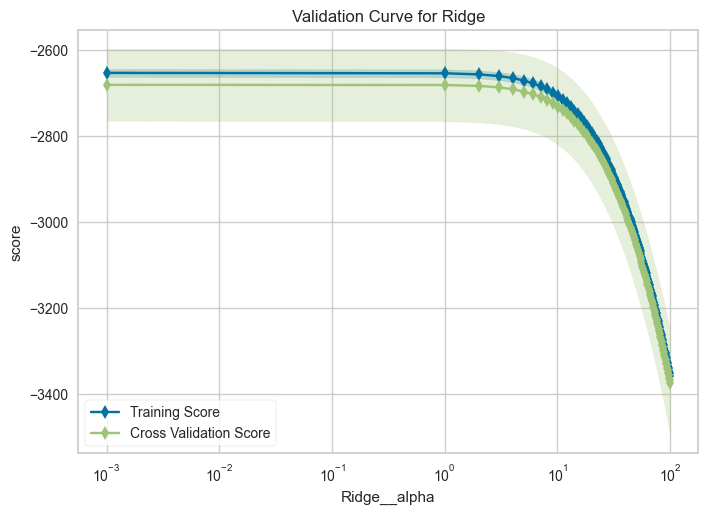

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [142]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    pipe_model, param_name="Ridge__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)
viz.fit(X_train, y_train)
viz.show()
# Validation Curve is used to visualize how a model responds to a particular hyperparameter and how that hyperparameter affects

In [143]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.896
mae,1974.804,1991.405
mse,7046702.041,7045444.433
rmse,2654.562,2654.326
mape,0.139,0.138


In [144]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = root_mean_squared_error(y_test, y_pred)
rm_mape = mean_absolute_percentage_error(y_test, y_pred)



In [145]:

ridge_grid_model.best_estimator_["Ridge"].coef_



array([-1.61382645e+03, -4.28435342e+03, -4.59484100e+03, -4.25424037e+03,
       -2.48092589e+03, -1.13470289e+03,  8.99684283e+03, -4.12753790e+03,
       -3.31428939e+03, -8.79685432e+02,  1.99301935e+03,  4.48287208e+02,
        1.10541096e+03,  2.32298403e+03, -4.06851974e+03, -1.78773209e+03,
        3.74793383e+03,  1.86843736e+03,  1.12069073e+02, -3.65113243e+03,
        9.05466135e+02,  1.91989275e+03, -4.97782926e+03, -3.21596619e+03,
       -6.81251884e+02, -4.75519755e+03,  1.37138745e+03, -1.44047804e+03,
       -4.37483488e+01, -8.95976941e+02, -2.80052760e+03, -2.72669689e+03,
        3.41290358e+03, -1.88475088e+03,  1.09519981e+03, -1.68810880e+03,
       -1.09736359e+03, -3.43947216e+03, -7.18120524e+02, -1.97561081e+03,
       -9.96195724e+02, -1.25390285e+03,  3.37481544e+03, -2.68665748e+03,
       -1.60535601e+03, -3.42009988e+03,  4.34215882e+03,  8.48269132e+03,
        1.85143007e+02, -1.28651726e+03,  2.65968885e+03, -1.66986880e+03,
        1.45941467e+03, -

In [146]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Coupe', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai TUCSON',
       'make_model_Hyundai i20', 'make_model_Hyundai i30',
       'make_model_Mercedes-Benz A 180', 'make_model_Nissan 350Z',
       'make_model_Nissan 370Z', 'make_model_Nissan Micra',
       'make_model_Nissan Qashqai', 'make_model_Nissan X-Trail',
       'make_model_Opel Adam', 'make_model_Opel Astra',
       'make_model_Opel Cascada', 'make_model_Opel Corsa',
       'make_model_Opel Grandland X', 'make_model_Opel Insignia',
       'make_model_Peugeot 2008', 'make_model_Peugeot 206',
       'make_model_Peugeot 207', 'make_model_Peugeot 208',
       'make_model_Peugeot 3008', 'make_mo

In [147]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

,Coef
age,-23409.973
mileage,-12960.739
make_model_Opel Adam,-4977.829
make_model_Opel Corsa,-4755.198
make_model_Dacia Sandero,-4594.841
make_model_Dacia Logan,-4284.353
make_model_Fiat 500,-4254.240
make_model_Fiat Tipo,-4127.538
make_model_Hyundai i20,-4068.520
make_model_Nissan Micra,-3651.132


## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [148]:
from sklearn.linear_model import Lasso

In [149]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [150]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.895
mae,1977.029,1994.006
mse,7061624.654,7072178.832
rmse,2657.372,2659.357
mape,0.138,0.137


In [151]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [152]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                           0.890
train_r2                                          0.893
test_neg_mean_absolute_error                  -1995.386
train_neg_mean_absolute_error                 -1975.985
test_neg_mean_squared_error                -7204974.964
train_neg_mean_squared_error               -7054188.158
test_neg_root_mean_squared_error              -2682.984
train_neg_root_mean_squared_error             -2655.956
test_neg_mean_absolute_percentage_error          -0.140
train_neg_mean_absolute_percentage_error         -0.138
dtype: float64

## Cross Validation

## Finding best alpha for Lasso

In [153]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha': alpha_space}  # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [154]:
lasso_grid_model.fit(X_train, y_train)

,estimator,"Pipeline(step...o', Lasso())])"
,param_grid,{'Lasso__alpha': array([1.0000...00000000e+02])}
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"


In [154]:
lasso_grid_model.best_estimator_

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [155]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.896
mae,1974.804,1991.402
mse,7046702.053,7045445.103
rmse,2654.562,2654.326
mape,0.139,0.138


In [156]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = root_mean_squared_error(y_test, y_pred)
lasm_mape = mean_absolute_percentage_error(y_test, y_pred)


In [157]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

,Coef
age,-23410.121
mileage,-12960.700
make_model_Opel Adam,-4471.648
make_model_Opel Corsa,-4249.088
make_model_Dacia Sandero,-4088.775
make_model_Dacia Logan,-3778.261
make_model_Fiat 500,-3748.067
make_model_Fiat Tipo,-3621.528
make_model_Hyundai i20,-3562.374
make_model_Nissan Micra,-3145.011


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [158]:
from sklearn.linear_model import ElasticNet

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [159]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.359,0.352
mae,5145.571,5240.665
mse,42164076.142,43781643.634
rmse,6493.387,6616.770
mape,0.406,0.397


## Cross Validation

In [160]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [161]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.359
train_r2                                           0.360
test_neg_mean_absolute_error                   -5145.884
train_neg_mean_absolute_error                  -5142.599
test_neg_mean_squared_error                -42172765.971
train_neg_mean_squared_error               -42115089.276
test_neg_root_mean_squared_error               -6490.853
train_neg_root_mean_squared_error              -6489.583
test_neg_mean_absolute_percentage_error           -0.406
train_neg_mean_absolute_percentage_error          -0.406
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [162]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
              'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1,
                                 return_train_score=True)

In [163]:
elastic_grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...lasticNet())])
,param_grid,"{'ElasticNet__alpha': [0.001, 0.01, ...], 'ElasticNet__l1_ratio': [0.5, 0.7, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"


In [164]:
elastic_grid_model.best_estimator_

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [171]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[
    elastic_grid_model.best_index_,
    ["mean_test_score", "mean_train_score"]
]

mean_test_score    -3255.905
mean_train_score   -3225.211
Name: 17, dtype: object

In [165]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.896
mae,1975.297,1992.719
mse,7047876.491,7050859.898
rmse,2654.784,2655.346
mape,0.139,0.138


In [166]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = root_mean_squared_error(y_test, y_pred)
em_mape = mean_absolute_percentage_error(y_test, y_pred)


## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [167]:
df_feat_imp = pd.DataFrame(
    data=lasso_grid_model.best_estimator_["Lasso"].coef_,
    index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
    columns=["Coef"]
).sort_values("Coef")



In [168]:
df_feat_imp

,Coef
age,-23410.121
mileage,-12960.700
make_model_Opel Adam,-4471.648
make_model_Opel Corsa,-4249.088
make_model_Dacia Sandero,-4088.775
make_model_Dacia Logan,-3778.261
make_model_Fiat 500,-3748.067
make_model_Fiat Tipo,-3621.528
make_model_Hyundai i20,-3562.374
make_model_Nissan Micra,-3145.011


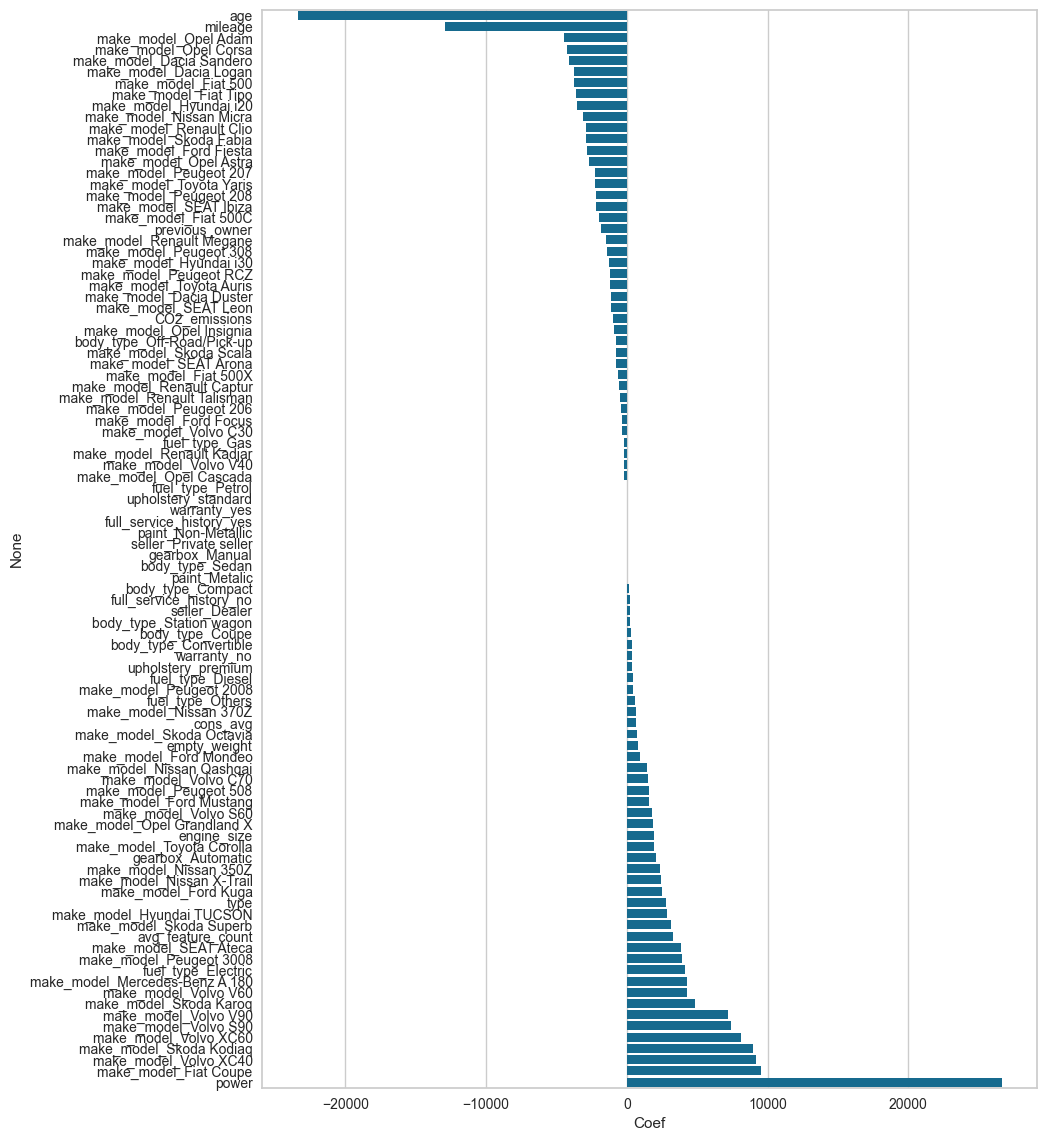

In [169]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

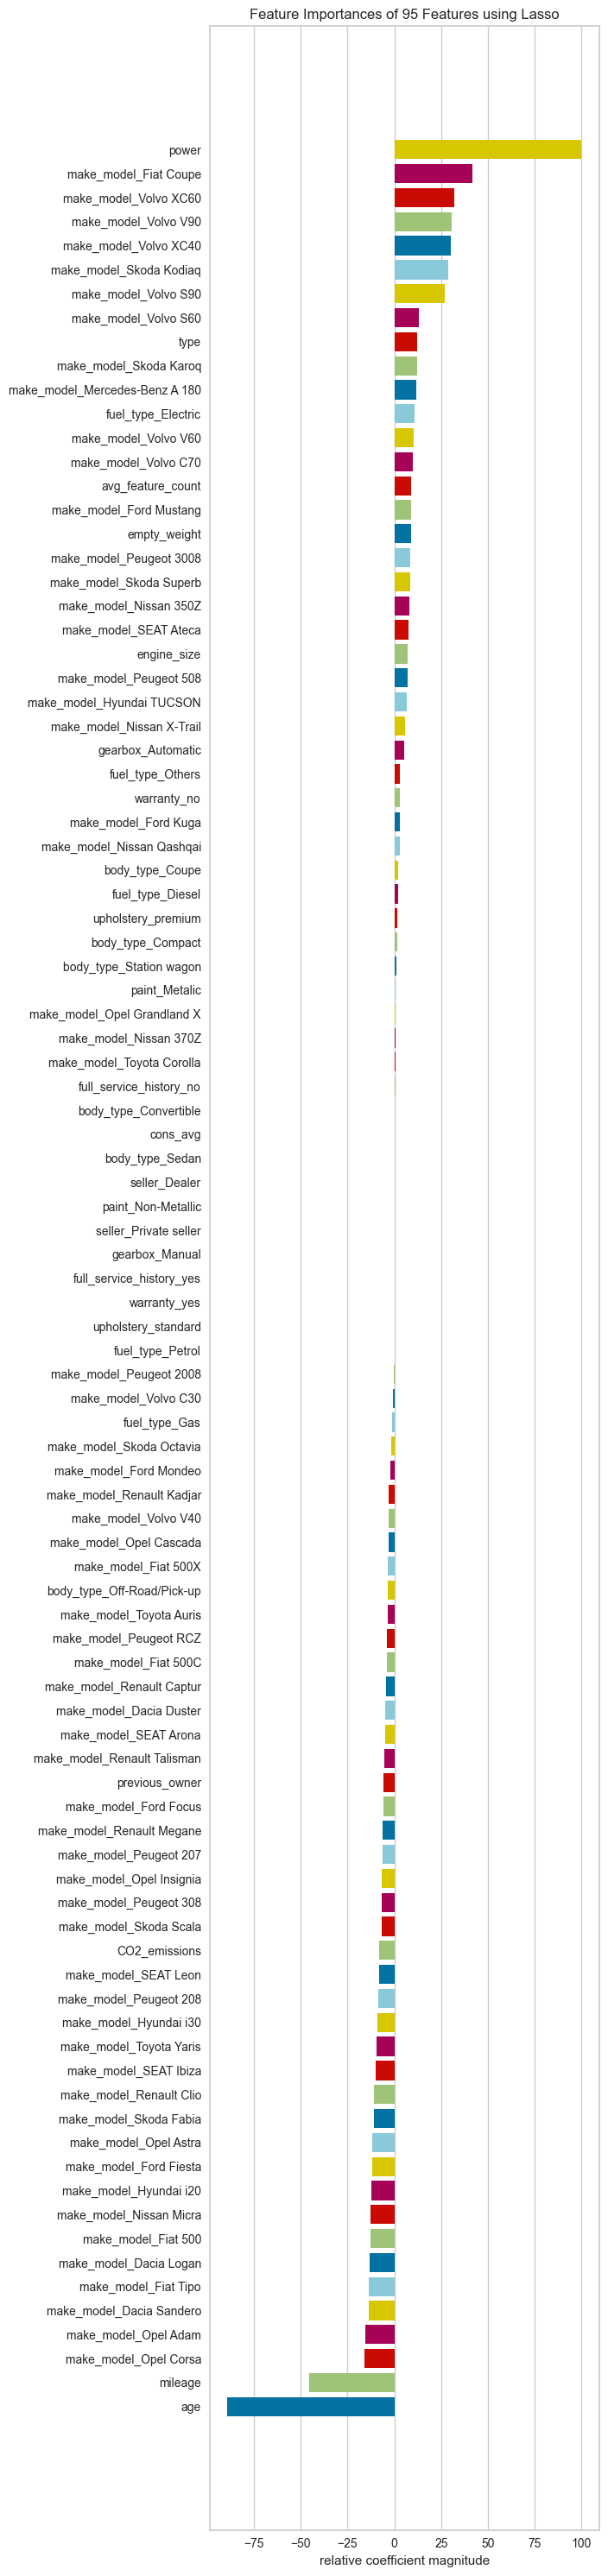

In [177]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(
    model,
    labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [170]:
df_selected_columns = df.copy()[[  
    "make_model",
    "power",
    "mileage",
    "age",
    "avg_feature_count",
    "type",
    "CO2_emissions",
    "empty_weight",
    "previous_owner",
    "engine_size",
    "price"
]]
# we select the top n features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the features that have the most impact on the prediction.

In [171]:
df_selected_columns

,make_model,power,mileage,age,avg_feature_count,type,CO2_emissions,empty_weight,previous_owner,engine_size,price
0,Dacia Duster,109.000,65018.000,5.000,9,Used,123.000,1504.000,0,1461.000,17900.000
1,Dacia Duster,109.000,146250.000,2.000,4,Used,115.000,1205.000,0,1461.000,14290.000
2,Dacia Duster,116.000,19271.000,1.000,2,Used,115.000,1405.000,0,1461.000,20409.000
3,Dacia Duster,109.000,74300.000,5.000,6,Used,126.000,1504.000,0,1461.000,15490.000
4,Dacia Duster,116.000,89352.000,3.000,4,Used,115.000,1320.000,0,1461.000,16000.000
...,...,...,...,...,...,...,...,...,...,...,...
14532,Volvo XC60,392.000,61448.000,3.000,18,Used,55.000,2223.000,1,1969.000,50890.000
14533,Volvo XC60,392.000,22021.000,2.000,18,Used,46.000,2161.000,1,1969.000,54190.000
14534,Volvo XC60,197.000,11953.000,1.000,20,Used,155.000,1869.000,1,1969.000,51900.000
14535,Volvo XC60,235.000,17860.000,0.000,20,Employee's car,144.000,1504.000,1,1969.000,64900.000


In [172]:
X = df_selected_columns.drop(columns=["price"])
y = df_selected_columns.price

# According to our data set with      n      new features, we determine our X and y and reconstruct the model.

# And we repeat the operations we did above.



In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [174]:
X_train.head()

,make_model,power,mileage,age,avg_feature_count,type,CO2_emissions,empty_weight,previous_owner,engine_size
6109,Opel Astra,145.000,5000.000,0.000,17,Employee's car,0.000,1345.000,1,1341.000
13682,Volvo S90,235.000,12000.000,1.000,15,Employee's car,127.000,1892.000,1,1969.000
12686,Toyota Auris,136.000,82099.000,3.000,10,Used,91.000,1333.000,0,1798.000
3325,Ford Mustang,450.000,17000.000,3.000,11,Used,279.000,1575.000,1,5038.000
8364,Peugeot 508,181.000,16753.000,3.000,10,Used,130.000,1333.000,0,1598.000


In [175]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    (OrdinalEncoder(categories=[cat_for_type]), cat_ordinal),
    remainder='passthrough',
    verbose_feature_names_out=False  #MinMaxScaler()
)


In [176]:

operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso(alpha=0.001))
]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.859,0.866
mae,2753.876,2703.795
mse,19770040.526,18099210.700
rmse,4446.351,4254.317
mape,0.210,0.205


## Cross Validate

In [177]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)


In [178]:
scores = pd.DataFrame(scores, index=range(1, 11))
scores.iloc[:, 2:].mean()


test_r2                                            0.861
train_r2                                           0.860
test_neg_mean_absolute_error                   -2773.100
train_neg_mean_absolute_error                  -2753.468
test_neg_mean_squared_error                -20070845.117
train_neg_mean_squared_error               -19754233.069
test_neg_root_mean_squared_error               -4416.295
train_neg_root_mean_squared_error              -4443.505
test_neg_mean_absolute_percentage_error           -0.212
train_neg_mean_absolute_percentage_error          -0.210
dtype: float64

In [179]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = root_mean_squared_error(y_test, y_pred)
fm_mape = mean_absolute_percentage_error(y_test, y_pred)


## 7. Visually Compare Models Performance In a Graph

In [180]:
compare = pd.DataFrame({
    "Models": ["lm1","linear_m2", "ridge_m", "lasso_m", "elastic_m", "final_m"],
    "r2_score": [lm_R2,lm2_R2, rm_R2, lasm_R2, em_R2, fm_R2],
    "mae":      [lm_mae ,lm2_mae, rm_mae, lasm_mae, em_mae, fm_mae],
    "rmse":     [lm_rmse, lm2_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
    "mape":     [lm_mape, lm2_mape, rm_mape, lasm_mape, em_mape, fm_mape]
})
compare

,Models,r2_score,mae,rmse,mape
0,lm1,0.905,2435.600,3483.644,0.193
1,linear_m2,0.896,1991.404,2654.324,0.138
2,ridge_m,0.896,1991.405,2654.326,0.138
3,lasso_m,0.896,1991.402,2654.326,0.138
4,elastic_m,0.896,1992.719,2655.346,0.138
5,final_m,0.866,2703.795,4254.317,0.205


In [181]:
X = df_clean.drop(columns=["price"])
y = df_clean.price


In [182]:
X.head()

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
0,Dacia Duster,Off-Road/Pick-up,Used,yes,65018.000,Manual,Non-Metallic,Dealer,109.000,1461.000,123.000,1504.000,yes,0,5.000,Diesel,4.750,standard,9
1,Dacia Duster,Off-Road/Pick-up,Used,yes,146250.000,Manual,Non-Metallic,Dealer,109.000,1461.000,115.000,1205.000,no,0,2.000,Diesel,4.450,standard,4
2,Dacia Duster,Off-Road/Pick-up,Used,yes,19271.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1405.000,no,0,1.000,Diesel,4.350,standard,2
3,Dacia Duster,Off-Road/Pick-up,Used,yes,74300.000,Manual,Non-Metallic,Dealer,109.000,1461.000,126.000,1504.000,no,0,5.000,Diesel,4.850,standard,6
4,Dacia Duster,Off-Road/Pick-up,Used,yes,89352.000,Manual,Non-Metallic,Dealer,116.000,1461.000,115.000,1320.000,no,0,3.000,Diesel,4.750,standard,4


In [183]:
cat_onehot = [
    'make_model',
    'body_type',        # Sedan, Station wagon, Compact, …
    'warranty',         # yes/no
    'gearbox',          # Manual/Automatic
    'paint',            # Metalic/Non-Metallic
    'seller',           # Dealer/Private seller
    'full_service_history',  # yes/no
    'fuel_type',         # Petrol, Diesel, Gas, Others, Electric
    'upholstery' 
]

cat_ordinal = ['type' ]



cat_for_type = ['Used', 'Demonstration', "Employee's car", 'Pre-registered']


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot  = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type])

column_trans = make_column_transformer(
    (enc_onehot,  cat_onehot),
    (enc_ordinal, cat_ordinal),
    remainder='passthrough',
    verbose_feature_names_out=False  # MinMaxScaler()
)



In [185]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Lasso", Lasso(alpha=0.001))
]

final_model = Pipeline(steps=operations)


In [186]:
final_model.fit(X, y)

,steps,"[('OneHot_Ordinal_Encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...), ('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [187]:
X.sample(12)

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
7276,Peugeot 308,Sedan,Used,yes,110000.000,Automatic,Non-Metallic,Dealer,131.000,1199.000,109.000,1305.000,yes,0,4.000,Petrol,5.450,standard,7
2249,Ford Focus,Station wagon,Used,yes,39076.000,Automatic,Non-Metallic,Dealer,150.000,1995.000,111.000,1559.000,yes,1,2.000,Diesel,4.400,standard,12
9418,SEAT Ibiza,Sedan,Used,yes,70573.000,Manual,Non-Metallic,Dealer,80.000,1598.000,109.000,1333.000,no,0,4.000,Diesel,3.950,standard,1
12338,Volvo C70,Convertible,Used,no,143447.000,Manual,Non-Metallic,Dealer,140.000,2435.000,212.000,1598.000,yes,2,16.000,Petrol,9.750,premium,8
989,Fiat 500,Compact,Used,yes,42545.000,Manual,Non-Metallic,Dealer,69.000,1242.000,110.000,960.000,no,1,2.000,Petrol,5.050,premium,9
4251,Nissan Micra,Compact,Used,yes,63322.000,Manual,Non-Metallic,Dealer,90.000,999.500,99.000,1169.000,no,0,4.000,Petrol,4.850,standard,1
4091,Nissan 350Z,Convertible,Used,yes,121000.000,Manual,Non-Metallic,Private seller,280.000,3498.000,273.000,1610.000,no,0,16.000,Petrol,12.400,premium,0
8303,Renault Kadjar,Off-Road/Pick-up,Used,yes,27903.000,Manual,Metalic,Dealer,140.000,1332.000,145.000,1504.000,no,1,3.000,Petrol,6.350,premium,12
9765,SEAT Ibiza,Compact,Used,yes,34900.000,Manual,Metalic,Dealer,95.000,999.000,106.000,1122.000,no,1,4.000,Petrol,4.950,standard,7
12846,Volvo XC40,Off-Road/Pick-up,Used,yes,66882.000,Automatic,Non-Metallic,Dealer,190.000,1969.000,135.000,1823.000,yes,1,4.000,Diesel,5.300,standard,15


## Prediction a new observation
- Create an observation and predict its price

In [188]:
# my_dict = {
#     "make_model": "Mercedes-Benz A 180",
#     "power_kw": 85,
#     "mileage": 30000,
#     "age": 3,
#     "engine_size": 1461,
#     "type": "Used"
# }


my_dict = {
    "make_model": "Mercedes-Benz A 180",
    "body_type": "Compact",
    "type": "Used",
    "warranty": "no",
    "mileage": 30000.0,
    "gearbox": "Manual",
    "paint": "Metalic",
    "seller": "Dealer",
    "power": 85.0,
    "engine_size": 1461.0,
    "CO2_emissions": 120.0,
    "empty_weight": 1270.0,
    "full_service_history": "yes",
    "previous_owner": 1,
    "age": 3.0,
    "fuel_type": "Petrol",
    "cons_avg": 5.3,
    "upholstery": "premium",
    "avg_feature_count": 13
}

In [189]:
df_new_input = pd.DataFrame([my_dict])
df_new_input

,make_model,body_type,type,warranty,mileage,gearbox,paint,seller,power,engine_size,CO2_emissions,empty_weight,full_service_history,previous_owner,age,fuel_type,cons_avg,upholstery,avg_feature_count
0,Mercedes-Benz A 180,Compact,Used,no,30000.000,Manual,Metalic,Dealer,85.000,1461.000,120.000,1270.000,yes,1,3.000,Petrol,5.300,premium,13


In [190]:
predicted_price = final_model.predict(df_new_input)
predicted_price

array([23434.63484794])

In [202]:

import pandas as pd
from IPython.display import display_html

# Recreate the metrics DataFrames
metrics_orig = pd.DataFrame({
    'Model':    ['lm1','linear_m2','ridge_m','lasso_m','elastic_m','final_m'],
    'r2_score': [0.905, 0.903, 0.903, 0.903, 0.903, 0.866],
    'mae':      [2435.600, 2287.815, 2287.813, 2287.817, 2288.704, 2703.795],
    'rmse':     [3483.644, 3215.393, 3215.392, 3215.393, 3215.836, 4254.317],
    'mape':     [0.193,   0.123,   0.123,   0.123,   0.123,   0.205]
})

metrics_new = pd.DataFrame({
    'Model':    ['lm1','linear_m2','ridge_m','lasso_m','elastic_m','final_m'],
    'r2_score': [0.905, 0.896, 0.896, 0.896, 0.896, 0.866],
    'mae':      [2435.600, 1991.404, 1991.405, 1991.402, 1992.719, 2703.795],
    'rmse':     [3483.644, 2654.324, 2654.326, 2654.326, 2655.346, 4254.317],
    'mape':     [0.193,   0.138,   0.138,   0.138,   0.138,   0.205]
})

# Compute global min/max for each metric across both tables
metrics = ['r2_score', 'mae', 'rmse', 'mape']
global_extents = {
    metric: (
        pd.concat([metrics_orig[metric], metrics_new[metric]]).min(),
        pd.concat([metrics_orig[metric], metrics_new[metric]]).max()
    )
    for metric in metrics
}

# Style original metrics with best=green, worst=red
styled_orig = metrics_orig.style
for metric in metrics:
    vmin, vmax = global_extents[metric]
    cmap = 'RdYlGn' if metric == 'r2_score' else 'RdYlGn_r'
    styled_orig = styled_orig.background_gradient(
        cmap=cmap, subset=[metric], vmin=vmin, vmax=vmax
    )
styled_orig = styled_orig.set_caption("Original Dataset Metrics")

# Style new metrics with best=green, worst=red
styled_new = metrics_new.style
for metric in metrics:
    vmin, vmax = global_extents[metric]
    cmap = 'RdYlGn' if metric == 'r2_score' else 'RdYlGn_r'
    styled_new = styled_new.background_gradient(
        cmap=cmap, subset=[metric], vmin=vmin, vmax=vmax
    )
styled_new = styled_new.set_caption("New Dataset Metrics")

# Display side by side
html = f"""
<div style="display: flex; gap: 50px;">
  <div>{styled_orig._repr_html_()}</div>
  <div>{styled_new._repr_html_()}</div>
</div>
"""
display_html(html, raw=True)



,Model,r2_score,mae,rmse,mape
0,lm1,0.905000,2435.600000,3483.644000,0.193000
1,linear_m2,0.903000,2287.815000,3215.393000,0.123000
2,ridge_m,0.903000,2287.813000,3215.392000,0.123000
3,lasso_m,0.903000,2287.817000,3215.393000,0.123000
4,elastic_m,0.903000,2288.704000,3215.836000,0.123000
5,final_m,0.866000,2703.795000,4254.317000,0.205000
,Model,r2_score,mae,rmse,mape
0,lm1,0.905000,2435.600000,3483.644000,0.193000
1,linear_m2,0.896000,1991.404000,2654.324000,0.138000
2,ridge_m,0.896000,1991.405000,2654.326000,0.138000
